In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 60, 'linewidths':0}

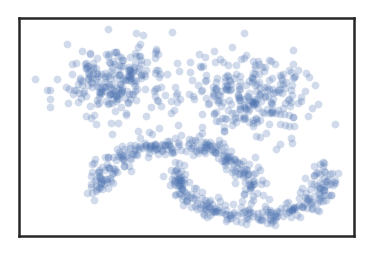

In [87]:
# moons, _ = data.make_moons(n_samples=500, noise=0.1)
# blobs, _ = data.make_blobs(n_samples=500, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.4)
# test_data = np.vstack([moons, blobs])

# read points
with open("dataset/1000.dat", 'r') as f:
    lines = f.readlines()
X, Y = [], []
for line in lines:
    x, y = line.strip().split()
    X.append(float(x))
    Y.append(float(y))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
plt.scatter(X, Y, color='b', **plot_kwds);

In [88]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True, approx_min_span_tree=False)
clusterer.fit(test_data);

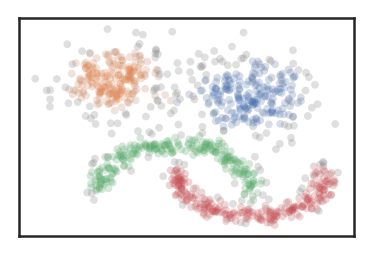

In [89]:
palette = sns.color_palette('deep', 100)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds);

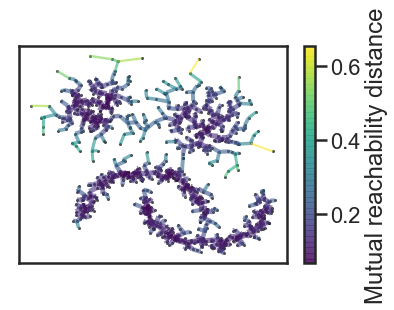

In [90]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=1,
                                      edge_linewidth=2)